# Importazione librerie

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# connessione a Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import dataset  World Weather Repository

https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/GlobalWeatherRepository.csv')

# Visualizza le prime righe
print(df.head())

       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy

### statistiche **dataset**

In [ ]:
location_counts = df.groupby('location_name').size()
print("***Numero di righe per ogni località")
print(location_counts)


df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')
df['date'] = df['last_updated'].dt.date
location_day_counts = df.groupby(['location_name', 'date']).size()
print("")
print("***Numero di righe per ogni località/giorno")
print(location_day_counts)

print("")
print("***Numero valori distinti località/giorno:")
print(location_day_counts.unique())

print("")
print("***Elenco variabili")
print(df.info())

#----Risultati:
#1) ci sono  248 località

#2) per alcune località ci sono 2 rilevazioni giornaliere,
#   per altre c'è una sola rilevazione per giorno.

#3) ci sono fino a 250 rilevazioni per località

***Numero di righe per ogni località
location_name
'S Gravenjansdijk    220
'S Gravenjansdyk      12
'S Gravenstaffel      16
-Kingdom               1
Abu Dhabi            250
                    ... 
Yangon               213
Yaounde               16
Yaren                249
Yerevan              250
Zagreb               248
Length: 248, dtype: int64

***Numero di righe per ogni località/giorno
location_name      date      
'S Gravenjansdijk  2024-05-31    1
                   2024-06-01    1
                   2024-06-04    1
                   2024-06-05    1
                   2024-06-11    1
                                ..
Zagreb             2025-01-17    1
                   2025-01-18    1
                   2025-01-19    1
                   2025-01-20    1
                   2025-01-21    1
Length: 48286, dtype: int64

***Numero valori distinti località/giorno:
[1 2]

***Elenco variabili
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48526 entries, 0 to 48525
Data columns 

# Esclusione di variabili ridondanti

In [ ]:
df.drop(columns=["country", "location_name",  # ridondante con latitude e longitude
                 "temperature_fahrenheit",    # ridondante con temperature_celsius
                 "last_updated","date",       # ridondanti con last_updated_epoch
                 "wind_mph",                  # ridondante con wind_kph
                 "gust_mph",                  # ridondante con gust_kph
                 "precip_mm",                 # ridondante con precip_in
                 "pressure_in",               # ridondante con pressure_mb
                 "visibility_km",             # ridondante con visibility_miles
                 "feels_like_fahrenheit","feels_like_celsius",   # ridondanti con combinazione temperatura, umidità, vento
                 "air_quality_PM10",          # ridondante con PM2.5
                 "wind_direction",            # ridondante con Wind_degree
                 "sunrise", "sunset", "moonrise", "moonset", "moon_phase", "moon_illumination"], inplace=True)  # Escludo le variabili temporali legate a eventi celesti non necessari

print("**Elenco variabili")
print(df.info())

**Elenco variabili
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48526 entries, 0 to 48525
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      48526 non-null  float64
 1   longitude                     48526 non-null  float64
 2   timezone                      48526 non-null  object 
 3   last_updated_epoch            48526 non-null  int64  
 4   temperature_celsius           48526 non-null  float64
 5   condition_text                48526 non-null  object 
 6   wind_kph                      48526 non-null  float64
 7   wind_degree                   48526 non-null  int64  
 8   pressure_mb                   48526 non-null  float64
 9   precip_in                     48526 non-null  float64
 10  humidity                      48526 non-null  int64  
 11  cloud                         48526 non-null  int64  
 12  visibility_miles              48526 non-n

# Conversione formati:

In [ ]:
 # 1. Encoding della variabile categorica condition_text con il Label Encoding (in alternativa a One-hot Encoding)
#Converte ogni condizione meteo in un numero intero univoco.
df['condition_text_encoded'], uniques = pd.factorize(df['condition_text'])
df.drop(columns=['condition_text'], inplace=True)

# 2. Encoding della variabile categorica timezone per convertirla a categorica numerica
df['timezone'] = df['timezone'].astype('category').cat.codes

print("**Elenco variabili")
print(df.info())

**Elenco variabili
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48526 entries, 0 to 48525
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      48526 non-null  float64
 1   longitude                     48526 non-null  float64
 2   timezone                      48526 non-null  int16  
 3   last_updated_epoch            48526 non-null  int64  
 4   temperature_celsius           48526 non-null  float64
 5   wind_kph                      48526 non-null  float64
 6   wind_degree                   48526 non-null  int64  
 7   pressure_mb                   48526 non-null  float64
 8   precip_in                     48526 non-null  float64
 9   humidity                      48526 non-null  int64  
 10  cloud                         48526 non-null  int64  
 11  visibility_miles              48526 non-null  float64
 12  uv_index                      48526 non-n

#  Creazione target:

In [ ]:
df["target"] = df["temperature_celsius"]
df.drop(columns=["temperature_celsius"], inplace=True)

# Matrice di Correlazione:

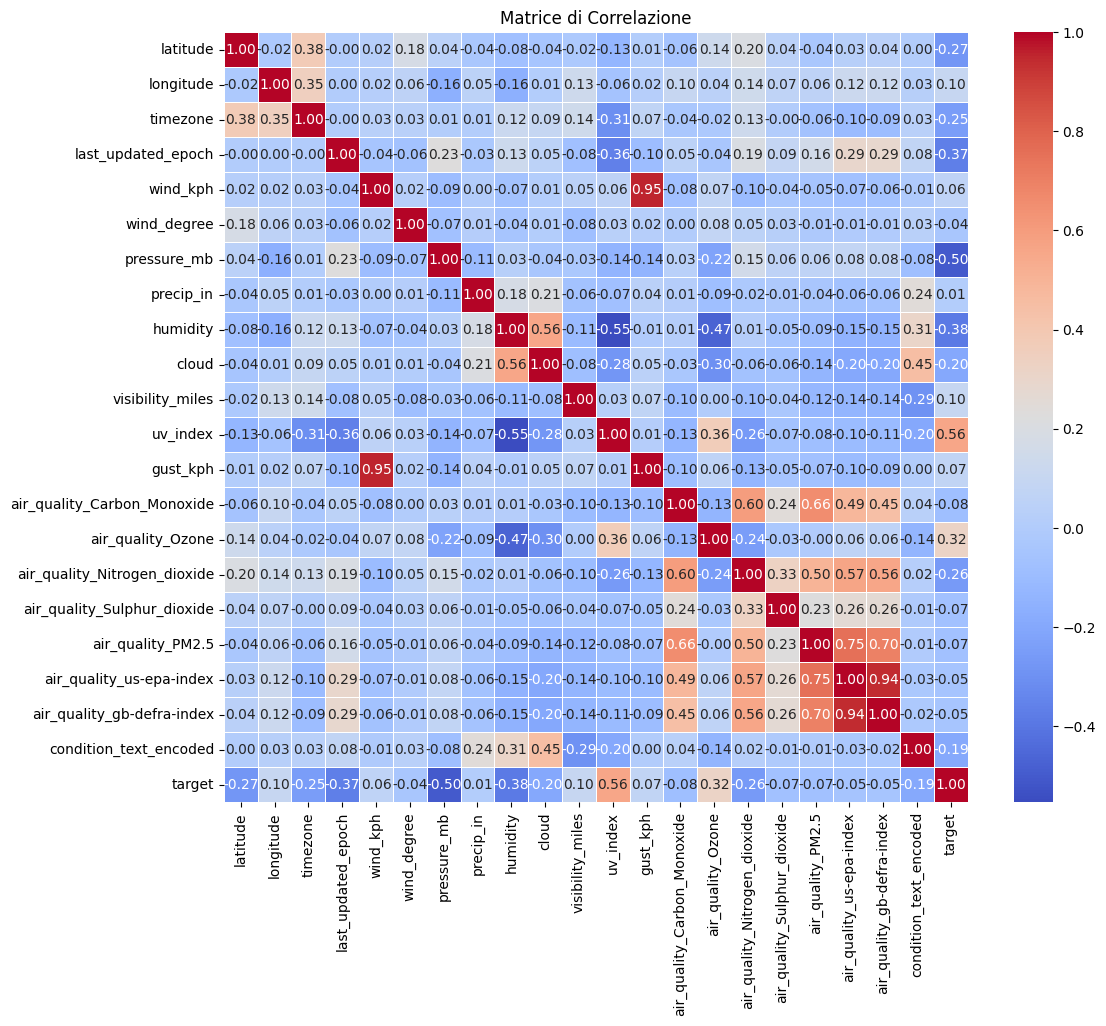

**Elenco variabili
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48526 entries, 0 to 48525
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      48526 non-null  float64
 1   longitude                     48526 non-null  float64
 2   timezone                      48526 non-null  int16  
 3   last_updated_epoch            48526 non-null  int64  
 4   wind_kph                      48526 non-null  float64
 5   wind_degree                   48526 non-null  int64  
 6   pressure_mb                   48526 non-null  float64
 7   precip_in                     48526 non-null  float64
 8   humidity                      48526 non-null  int64  
 9   cloud                         48526 non-null  int64  
 10  visibility_miles              48526 non-null  float64
 11  uv_index                      48526 non-null  float64
 12  air_quality_Carbon_Monoxide   48526 non-n

In [ ]:
corr_matrix = df.corr()

# Visualizziamo la matrice di correlazione con una heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice di Correlazione")
plt.show()

#---tolgo la variabile "air_quality_gb-defra-index" perchè fortemente correlata con "air_quality_us-epa-index" (0.94)
#---tolgo la variabile "gust_kph"  perchè fortemente correlata con  "wind_kph" (0.95)
df.drop(columns=["air_quality_gb-defra-index", "gust_kph"], inplace=True)

#-------------------------#
#--- Elenco variabili: ---#
#-------------------------#
print("**Elenco variabili")
print(df.info())

# Calcolo missing

In [ ]:
#--------------------------------#
#--- Statistiche descrittive: ---#
#--------------------------------#
print("")
print("***Statistiche descrittive:\n")
print(df.describe())

#--------------------------#
#---Stampa dei missing: ---#
#--------------------------#

def calculate_missing_data(df):
    # Calcola il numero di valori mancanti per ogni colonna
    missing_values = df.isna().sum()
    # Calcola la percentuale di valori mancanti per ogni colonna
    missing_percentage = (missing_values / len(df)) * 100
    # Crea il DataFrame risultante
    missing_data = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percentage
    })
    return missing_data

calculate_missing_data(df)


***Statistiche descrittive:

           latitude     longitude      timezone  last_updated_epoch  \
count  48526.000000  48526.000000  48526.000000        4.852600e+04   
mean      19.141643     22.206364     96.199790        1.726661e+09   
std       24.481465     65.788240     55.761207        6.286949e+06   
min      -41.300000   -175.200000      0.000000        1.715849e+09   
25%        3.750000     -6.250000     46.000000        1.721134e+09   
50%       17.250000     23.320000     97.000000        1.726743e+09   
75%       40.400000     50.580000    145.000000        1.732092e+09   
max       64.150000    179.220000    189.000000        1.737455e+09   

           wind_kph   wind_degree   pressure_mb     precip_in      humidity  \
count  48526.000000  48526.000000  48526.000000  48526.000000  48526.000000   
mean      13.338656    171.002040   1013.739624      0.005549     63.207662   
std       15.923109    103.207281      7.058559      0.025047     24.689118   
min        3.6

,Missing Values,Percentage
latitude,0,0.0
longitude,0,0.0
timezone,0,0.0
last_updated_epoch,0,0.0
wind_kph,0,0.0
wind_degree,0,0.0
pressure_mb,0,0.0
precip_in,0,0.0
humidity,0,0.0
cloud,0,0.0


# Suddivisione X_train, X_test, y_train, y_test:

In [ ]:
#---------------------------#
#--- Suddivisione X e y: ---#
#---------------------------#

X = df.drop(columns=["target"])
y = df["target"]

#------------------------------------------------------#
#--- Suddivisione X_train, X_test, y_train, y_test: ---#
#------------------------------------------------------#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizzazione delle caratteristiche

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creazione, addestramento modello e previsioni sul test set

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()     # Creazione del modello
model.fit(X_train, y_train)    # Addestramento del modello
y_pred = model.predict(X_test) # Previsioni sul test set

#  Valutazione del modello  

In [ ]:
# Calcoliamo le metriche di valutazione
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Stampa dei risultati
print(f"Errore Quadratico Medio (MSE): {mse}")
print(f"Errore Assoluto Medio (MAE): {mae}")
print(f"Coefficiente di determinazione (R²): {r2}")

Errore Quadratico Medio (MSE): 33.392847004132854
Errore Assoluto Medio (MAE): 4.461203740693866
Coefficiente di determinazione (R²): 0.6035994676271417


# applico la PCA e calcolo varianza spiegata

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()  #--- Applicare la PCA senza ridurre le componenti (nessun parametro n_components),
             #    quindi restituirà tutte le componenti
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


#--- Varianza spiegata:
explained_variance = pca.explained_variance_ratio_


#--- Stampa varianza spiegata da ogni singola componente
print("Varianza spiegata da ogni componente principale:")
for i, variance in enumerate(explained_variance):
    print(f"PC{i+1}: {variance:.4f}")


#--- Stampa varianza spiegata cumulativa per ogni componente
cumulative_variance = explained_variance.cumsum()
for i, cumulative in enumerate(cumulative_variance):
    print(f"PC{i+1}: {cumulative:.4f}")

Varianza spiegata da ogni componente principale:
PC1: 0.1666
PC2: 0.1427
PC3: 0.0897
PC4: 0.0786
PC5: 0.0669
PC6: 0.0558
PC7: 0.0512
PC8: 0.0469
PC9: 0.0459
PC10: 0.0437
PC11: 0.0420
PC12: 0.0344
PC13: 0.0286
PC14: 0.0249
PC15: 0.0233
PC16: 0.0200
PC17: 0.0166
PC18: 0.0137
PC19: 0.0083
PC1: 0.1666
PC2: 0.3094
PC3: 0.3991
PC4: 0.4777
PC5: 0.5446
PC6: 0.6004
PC7: 0.6516
PC8: 0.6986
PC9: 0.7445
PC10: 0.7882
PC11: 0.8302
PC12: 0.8646
PC13: 0.8932
PC14: 0.9181
PC15: 0.9414
PC16: 0.9613
PC17: 0.9779
PC18: 0.9917
PC19: 1.0000


### Applicazione PCA con 13 componenti principali e ricalcolo modello

In [ ]:
# Creare l'oggetto PCA e limitarlo a 13 componenti principali
pca = PCA(n_components=13)  # Imposto n_components a 13
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Verifica della varianza spiegata
explained_variance = pca.explained_variance_ratio_

# Stampa della varianza cumulativa
cumulative_variance = explained_variance.cumsum()
for i, cumulative in enumerate(cumulative_variance):
    print(f"PC{i+1}: {cumulative:.4f}")

#------------------------------------------------------------------#
#--- Creazione, addestramento modello e previsioni sul test set ---#
#------------------------------------------------------------------#

# Creazione del modello di regressione lineare
model = LinearRegression()  # Creazione del modello
model.fit(X_train_pca, y_train)  # Addestramento del modello con i dati trasformati
y_pred = model.predict(X_test_pca)  # Previsioni sul test set

#----------------------------------#
#--- Ri-Valutazione del modello ---#
#----------------------------------#

# Calcoliamo le metriche di valutazione
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Stampa dei risultati
print(f"Errore Quadratico Medio (MSE): {mse}")
print(f"Errore Assoluto Medio (MAE): {mae}")
print(f"Coefficiente di determinazione (R²): {r2}")

PC1: 0.1666
PC2: 0.3094
PC3: 0.3991
PC4: 0.4777
PC5: 0.5446
PC6: 0.6004
PC7: 0.6516
PC8: 0.6986
PC9: 0.7445
PC10: 0.7882
PC11: 0.8302
PC12: 0.8646
PC13: 0.8932
Errore Quadratico Medio (MSE): 35.09760944351405
Errore Assoluto Medio (MAE): 4.552674695003926
Coefficiente di determinazione (R²): 0.5833625366923123



Risultato:

il modello ha una discreta capacità predittiva, ma con margini di miglioramento.
Il valore di R² di 0.60 significa  che il modello spiega circa il 60% della variabilità del target (temperatura media)

L'uso di PCA a 13 elementi non ha portato ad un miglioramento delle prestazioni ( R² è diminuito leggermente).
Probabilmente ciò  ha comportato una perdita di informazioni significative, che ha portato a una leggera diminuzione della precisione del modello.




